## 1. Setup & Import Libraries

In [ ]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Reload modules để áp dụng thay đổi
import importlib
if 'src.data_utils' in sys.modules:
    importlib.reload(sys.modules['src.data_utils'])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

# Import config values
from config import (
    CLEANED_DATA_PATH, CATEGORIES, NUM_CLASSES,
    TRAIN_RATIO, VAL_RATIO, TEST_RATIO, RANDOM_SEED,
    VIS_DIR
)

# Set random seeds for reproducibility
np.random.seed(RANDOM_SEED)
import tensorflow as tf
tf.random.set_seed(RANDOM_SEED)

print(f"   Number of categories: {NUM_CLASSES}")
print(f"   Split ratios - Train: {TRAIN_RATIO}, Val: {VAL_RATIO}, Test: {TEST_RATIO}")

   Number of categories: 12
   Split ratios - Train: 0.7, Val: 0.15, Test: 0.15


## 2. Load & Prepare Data

In [7]:
from src.data_utils import load_data, prepare_text_data, encode_labels, split_data

# Load cleaned data
df = load_data(CLEANED_DATA_PATH)
print(f"\nData loaded: {df.shape}")
df.head()

Loaded 7274 samples from /content/drive/MyDrive/NLP-final-project-main/data/processed/data_cleaned.csv
Columns: ['product_name', 'description', 'brand', 'category']
Categories: 12
Category distribution:
category
Thể thao & Du lịch       646
Nhà cửa & Đời sống       645
Thực phẩm & Đồ uống      644
Thời trang Nam           619
Điện thoại & Phụ kiện    603
Giày dép                 600
Sách & Văn phòng phẩm    599
Đồ gia dụng              599
Đồ chơi trẻ em           599
Thời trang nữ            598
Mỹ phẩm & Làm đẹp        598
Laptop & Máy tính        524
Name: count, dtype: int64

Data loaded: (7274, 4)


,product_name,description,brand,category
0,đầm tiểu thư phối cổ sang chảnh thiết kế đi là...,Thông tin người mặc size S sản phẩm vòng eo rộ...,OEM,Thời trang nữ
1,đầm maxi cổ vuông thắt nơ phối viền sang trọng,Thông tin người mặc size S sản phẩm vòng eo rộ...,OEM,Thời trang nữ
2,đầm linen dáng suông cỏ v có túi 2 bên sườn kè...,shop chuyên cung cấp quần âu áo sơ mi áo kiểu ...,ARCTIC HUNTER,Thời trang nữ
3,đầm suông nữ thiết kế rút eo tiện lợi có tui 2...,shop chuyên cung cấp quần âu áo sơ mi áo kiểu ...,ARCTIC HUNTER,Thời trang nữ
4,đầm sơ mi suông dáng xòe thiết kế tay sắn phối...,nội dung sản phẩm thanh lịch hơn với sợi vải t...,ARCTIC HUNTER,Thời trang nữ


In [8]:
# Prepare text data
df = prepare_text_data(
    df,
    text_columns=['product_name', 'description', 'brand'],
    preprocess=True,
    use_word_segmentation = True,
    remove_stopwords=True
)

print(f"   Data shape: {df.shape}")
print(f"\nSample processed text:")
print(df['text'].iloc[0][:300] + "...")

Preprocessing text data...


Preprocessing: 100%|██████████| 7274/7274 [02:11<00:00, 55.38it/s]

   Data shape: (7274, 5)

Sample processed text:
đầm tiểu_thư_phối cổ sang chảnh thiết_kế đi_chơi đều đẹp thông_tin người mặc size s vòng eo rộng 64 cm 66 cm vòng ngực rộng 84 cm 86 cm vòng mông rộng 86 cm 88 cm size m vòng_eo rộng 68 cm 70 cm vòng ngực rộng 88 cm 90 cm vòng mông rộng 88 cm 90 cm size_l vòng eo rộng 72 cm 74 cm vòng ngực rộng 92 c...


In [9]:
# Encode labels
labels, label_encoder = encode_labels(df, save_encoder=True)
df['label'] = labels

class_names = list(label_encoder.classes_)
print(f"   Class names: {class_names}")

Label encoder saved to /content/drive/MyDrive/NLP-final-project-main/models/label_encoder.pkl
Number of classes: 12
Classes: ['Giày dép', 'Laptop & Máy tính', 'Mỹ phẩm & Làm đẹp', 'Nhà cửa & Đời sống', 'Sách & Văn phòng phẩm', 'Thể thao & Du lịch', 'Thời trang Nam', 'Thời trang nữ', 'Thực phẩm & Đồ uống', 'Điện thoại & Phụ kiện', 'Đồ chơi trẻ em', 'Đồ gia dụng']
   Class names: ['Giày dép', 'Laptop & Máy tính', 'Mỹ phẩm & Làm đẹp', 'Nhà cửa & Đời sống', 'Sách & Văn phòng phẩm', 'Thể thao & Du lịch', 'Thời trang Nam', 'Thời trang nữ', 'Thực phẩm & Đồ uống', 'Điện thoại & Phụ kiện', 'Đồ chơi trẻ em', 'Đồ gia dụng']


In [10]:
# Split data
train_df, val_df, test_df = split_data(df, save=True)

print(f"\nData split completed:")
print(f"   Train: {len(train_df)} samples")
print(f"   Val: {len(val_df)} samples")
print(f"   Test: {len(test_df)} samples")

Train: 5091 samples (70.0%)
Val: 1091 samples (15.0%)
Test: 1092 samples (15.0%)
Split data saved to /content/drive/MyDrive/NLP-final-project-main/data/split

Data split completed:
   Train: 5091 samples
   Val: 1091 samples
   Test: 1092 samples


## 3. Feature Extraction (TF-IDF)

In [11]:
from src.feature_extraction import prepare_features

# Extract TF-IDF features
X_train, X_val, X_test, vectorizer = prepare_features(
    train_df['text'],
    val_df['text'],
    test_df['text'],
    save_vectorizer=True
)

# Get labels
y_train = train_df['label'].values
y_val = val_df['label'].values
y_test = test_df['label'].values

print(f"\nTF-IDF Vocabulary size: {vectorizer.vocab_size}")
print(f"   Feature matrix shape: {X_train.shape}")

TF-IDF Vectorizer fitted with 10000 features
Vectorizer saved to /content/drive/MyDrive/NLP-final-project-main/models/tfidf_vectorizer.pkl

Feature shapes:
  Train: (5091, 10000)
  Val: (1091, 10000)
  Test: (1092, 10000)

TF-IDF Vocabulary size: 10000
   Feature matrix shape: (5091, 10000)


## 4. Train Machine Learning Models

In [12]:
from src.ml_models import train_all_ml_models

# Train all ML models
ml_results = train_all_ml_models(
    X_train, y_train,
    X_val, y_val,
    class_names=class_names,
    save_models=True
)

Logistic Regression initialized with config: {'C': 1.0, 'max_iter': 1000, 'class_weight': 'balanced', 'solver': 'lbfgs', 'multi_class': 'multinomial', 'random_state': 42}
SVM initialized with config: {'C': 1.0, 'kernel': 'linear', 'class_weight': 'balanced', 'random_state': 42, 'probability': True}
Random Forest initialized with config: {'n_estimators': 200, 'max_depth': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1}

Training Logistic Regression...
Training Accuracy: 0.9929

Training Results for Logistic Regression:
  Accuracy: 0.9929
  F1 (macro): 0.9927
  F1 (weighted): 0.9929

Classification Report:
                       precision    recall  f1-score   support

             Giày dép       1.00      1.00      1.00       420
    Laptop & Máy tính       0.99      0.98      0.98       367
    Mỹ phẩm & Làm đẹp       0.99      0.98      0.99       419
   Nhà cửa & Đời sống       1.00      1.00      1.00       451
Sách & 

In [13]:
# Evaluate ML models on test set
print("\n" + "="*70)
print("              TEST SET EVALUATION (ML Models)")
print("="*70)

ml_test_results = {}
for name, result in ml_results.items():
    model = result['model']
    test_metrics = model.evaluate(X_test, y_test, class_names, "Test")
    ml_test_results[name] = test_metrics


              TEST SET EVALUATION (ML Models)

Test Results for Logistic Regression:
  Accuracy: 0.9725
  F1 (macro): 0.9723
  F1 (weighted): 0.9726

Classification Report:
                       precision    recall  f1-score   support

             Giày dép       1.00      1.00      1.00        90
    Laptop & Máy tính       1.00      0.94      0.97        78
    Mỹ phẩm & Làm đẹp       1.00      0.96      0.98        89
   Nhà cửa & Đời sống       0.99      0.98      0.98        97
Sách & Văn phòng phẩm       0.94      0.94      0.94        90
   Thể thao & Du lịch       0.99      0.99      0.99        97
       Thời trang Nam       0.95      0.98      0.96        93
        Thời trang nữ       0.99      0.96      0.97        90
  Thực phẩm & Đồ uống       0.99      0.99      0.99        97
Điện thoại & Phụ kiện       0.96      0.98      0.97        91
       Đồ chơi trẻ em       0.92      0.96      0.94        90
          Đồ gia dụng       0.95      1.00      0.97        90

     

## 5. Train Deep Learning Models


### 5.1 LSTM Model

In [14]:
from src.dl_models import LSTMClassifier

# Convert sparse matrix to dense for LSTM
print("Converting sparse matrices to dense...")
X_train_dense = X_train.toarray().astype(np.float32)
X_val_dense = X_val.toarray().astype(np.float32)
X_test_dense = X_test.toarray().astype(np.float32)

print(f"Conversion completed")
print(f"   Train shape: {X_train_dense.shape}")
print(f"   Val shape: {X_val_dense.shape}")
print(f"   Test shape: {X_test_dense.shape}")

Converting sparse matrices to dense...
Conversion completed
   Train shape: (5091, 10000)
   Val shape: (1091, 10000)
   Test shape: (1092, 10000)


In [ ]:
# Build and train LSTM
lstm_model = LSTMClassifier(num_classes=NUM_CLASSES)
lstm_model.build(input_dim=X_train_dense.shape[1])

lstm_model.fit(
    X_train_dense, y_train,
    X_val_dense, y_val,
    epochs=15,  
    batch_size=32
)

# Save model
lstm_model.save()


LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 256)         │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,011,788 (22.93 MB)

 Trainable params: 6,010,252 (22.93 MB)

 Non-trainable params: 1,536 (6.00 KB)


Training LSTM...
Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.6692 - loss: 4.5976 - val_accuracy: 0.6902 - val_loss: 3.7408 - learning_rate: 0.0010
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9533 - loss: 1.5054 - val_accuracy: 0.9267 - val_loss: 2.8034 - learning_rate: 0.0010
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9672 - loss: 1.3953 - val_accuracy: 0.9395 - val_loss: 1.7028 - learning_rate: 0.0010
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9536 - loss: 1.7017 - val_accuracy: 0.9285 - val_loss: 1.6876 - learning_rate: 0.0010
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.9634 - loss: 1.5790 - val_accuracy: 0.9533 - val_loss: 1.7666 - learning_rate: 0.0010
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9690 - loss: 1.5241 - val_accuracy: 0.9514 - val_loss: 1.4634 - learning_rate: 0.0010
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accurac

'/content/drive/MyDrive/NLP-final-project-main/models/dl/lstm_model.keras'

In [16]:
# Evaluate LSTM on test set
lstm_test_metrics = lstm_model.evaluate(X_test_dense, y_test, class_names, "Test")


Test Results for LSTM:
  Accuracy: 0.9789
  F1 (macro): 0.9786
  F1 (weighted): 0.9789

Classification Report:
                       precision    recall  f1-score   support

             Giày dép       1.00      1.00      1.00        90
    Laptop & Máy tính       1.00      0.92      0.96        78
    Mỹ phẩm & Làm đẹp       0.99      0.98      0.98        89
   Nhà cửa & Đời sống       0.99      0.99      0.99        97
Sách & Văn phòng phẩm       0.96      0.98      0.97        90
   Thể thao & Du lịch       1.00      0.96      0.98        97
       Thời trang Nam       0.99      0.98      0.98        93
        Thời trang nữ       0.98      0.98      0.98        90
  Thực phẩm & Đồ uống       0.98      1.00      0.99        97
Điện thoại & Phụ kiện       0.95      1.00      0.97        91
       Đồ chơi trẻ em       0.96      0.97      0.96        90
          Đồ gia dụng       0.97      0.99      0.98        90

             accuracy                           0.98      1092
    

### 5.2 PhoBERT Model (Optional - Requires GPU)

In [17]:
# PhoBERT training (có thể skip nếu muốn)
TRAIN_PHOBERT = True  # Đổi thành True nếu muốn train PhoBERT

if TRAIN_PHOBERT:
    from src.dl_models import PhoBERTClassifier

    # PhoBERT uses raw text, not TF-IDF
    phobert_model = PhoBERTClassifier(num_classes=NUM_CLASSES)
    phobert_model.build()

    phobert_model.fit(
        train_df['text'].tolist(),
        y_train,
        val_df['text'].tolist(),
        y_val,
        epochs=3,
        batch_size=16
    )

    phobert_model.save()
    phobert_test_metrics = phobert_model.evaluate(
        test_df['text'].tolist(), y_test, class_names, "Test"
    )
    print("\nPhoBERT training completed!")
else:
    print("PhoBERT training skipped")
    print("   Set TRAIN_PHOBERT = True to train PhoBERT")
    phobert_test_metrics = None

Using device: cuda


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



PhoBERT Model loaded: vinai/phobert-base
Number of parameters: 135,007,500

Training PhoBERT...


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Epoch 1/3: 100%|██████████| 319/319 [03:39<00:00,  1.45it/s, loss=0.179]


Epoch 1: Train Loss = 1.1895, Val Loss = 0.2343, Val Acc = 0.9615


Epoch 2/3: 100%|██████████| 319/319 [03:43<00:00,  1.43it/s, loss=0.0593]


Epoch 2: Train Loss = 0.1480, Val Loss = 0.1090, Val Acc = 0.9753


Epoch 3/3: 100%|██████████| 319/319 [03:43<00:00,  1.43it/s, loss=0.0301]


Epoch 3: Train Loss = 0.0654, Val Loss = 0.1028, Val Acc = 0.9762
PhoBERT model saved to /content/drive/MyDrive/NLP-final-project-main/models/dl/phobert_model

Test Results for PhoBERT:
  Accuracy: 0.9808
  F1 (macro): 0.9805
  F1 (weighted): 0.9808

Classification Report:
                       precision    recall  f1-score   support

             Giày dép       1.00      1.00      1.00        90
    Laptop & Máy tính       0.99      0.96      0.97        78
    Mỹ phẩm & Làm đẹp       0.99      0.98      0.98        89
   Nhà cửa & Đời sống       0.99      0.99      0.99        97
Sách & Văn phòng phẩm       0.96      0.94      0.95        90
   Thể thao & Du lịch       0.97      0.99      0.98        97
       Thời trang Nam       1.00      0.98      0.99        93
        Thời trang nữ       0.98      1.00      0.99        90
  Thực phẩm & Đồ uống       1.00      0.99      0.99        97
Điện thoại & Phụ kiện       0.97      0.99      0.98        91
       Đồ chơi trẻ em       0.97

## 6. Model Comparison & Visualization

In [18]:
from src.evaluation import (
    plot_model_comparison, plot_confusion_matrix, plot_per_class_metrics,
    plot_training_history, create_results_summary, print_final_report,
    save_all_visualizations
)

# Combine all results
all_results = {
    'Logistic Regression': ml_test_results['logistic_regression'],
    'SVM': ml_test_results['svm'],
    'Random Forest': ml_test_results['random_forest'],
    'LSTM': lstm_test_metrics
}

if phobert_test_metrics:
    all_results['PhoBERT'] = phobert_test_metrics

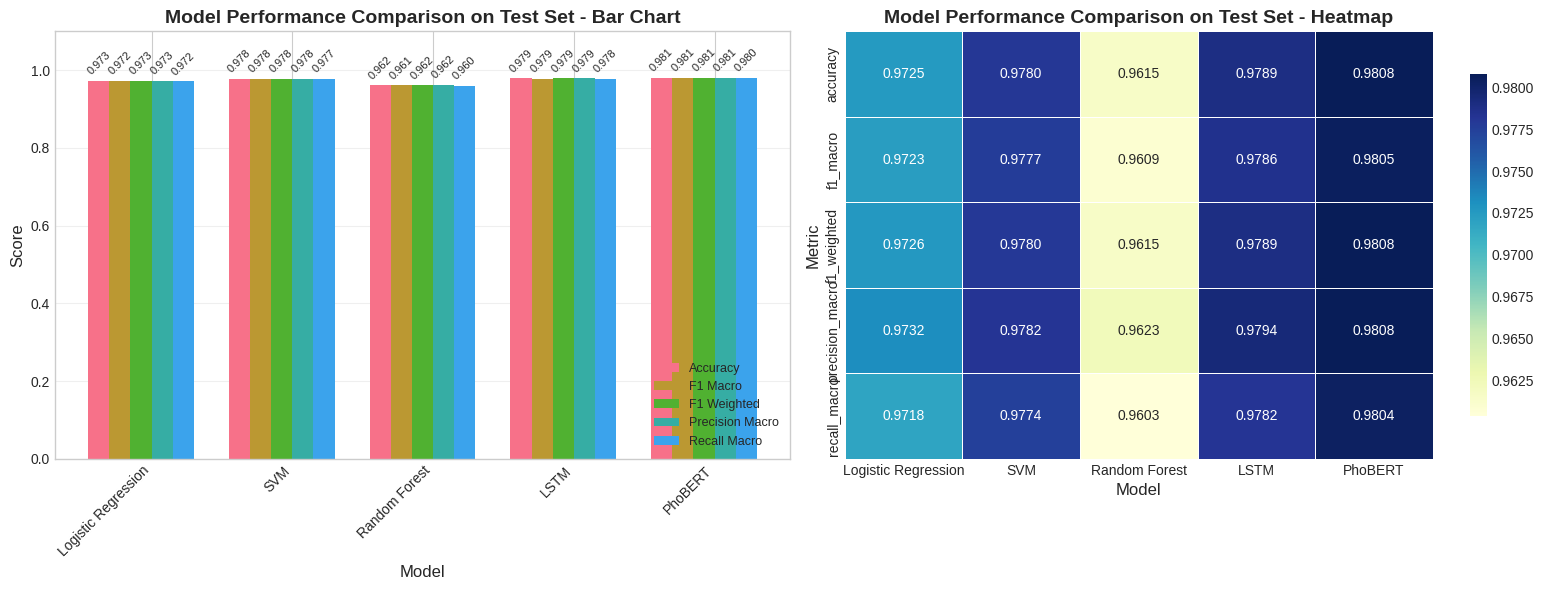

In [19]:
# Model comparison
fig = plot_model_comparison(
    all_results,
    title="Model Performance Comparison on Test Set",
    figsize=(16, 6)
)
plt.show()

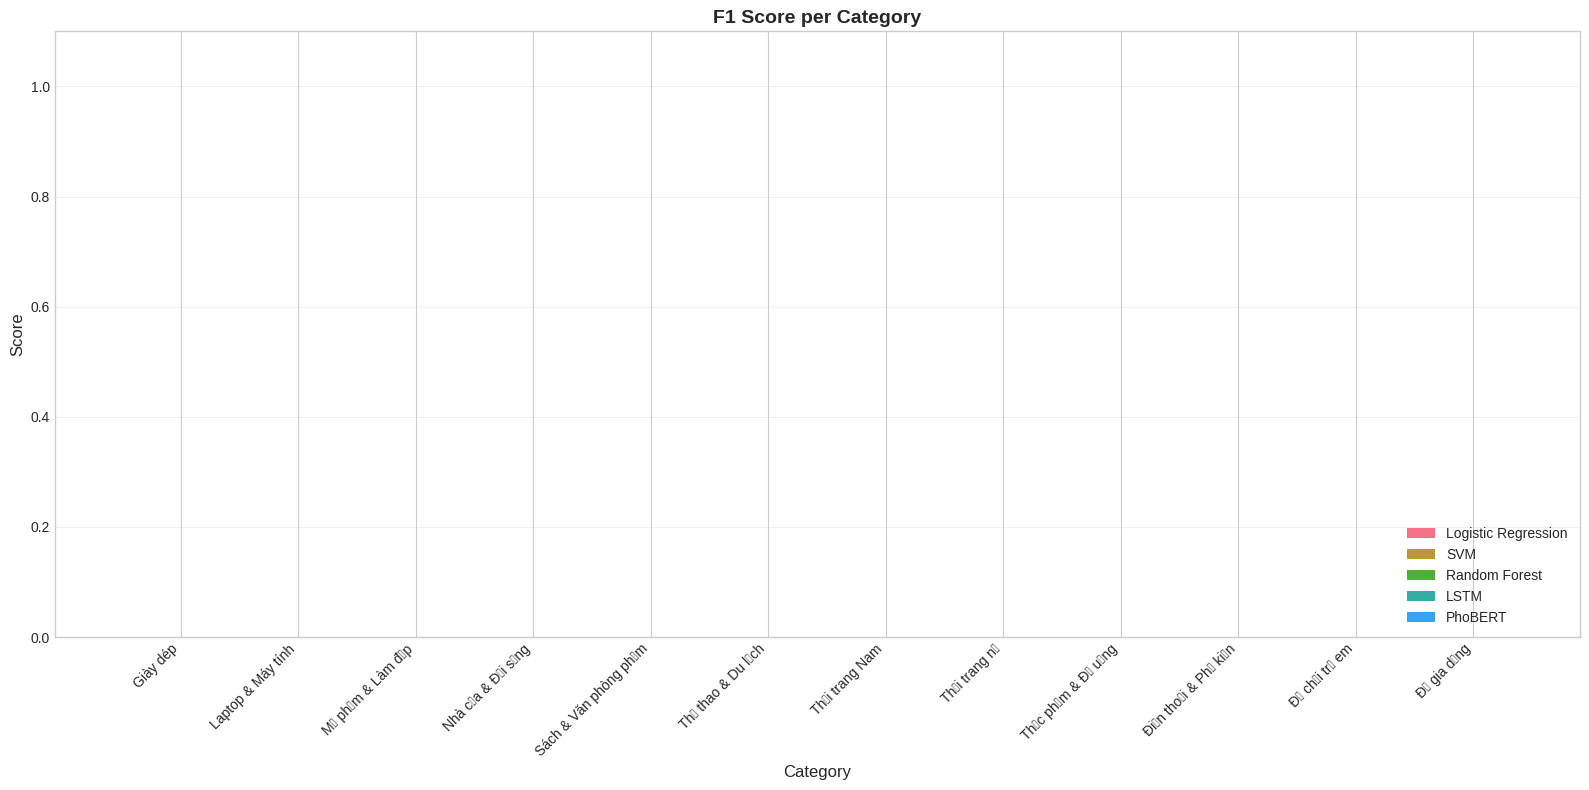

In [20]:
# Per-class F1 scores
fig = plot_per_class_metrics(
    all_results,
    class_names,
    metric='f1_per_class',
    title="F1 Score per Category",
    figsize=(16, 8)
)
plt.show()

Best Model: PhoBERT


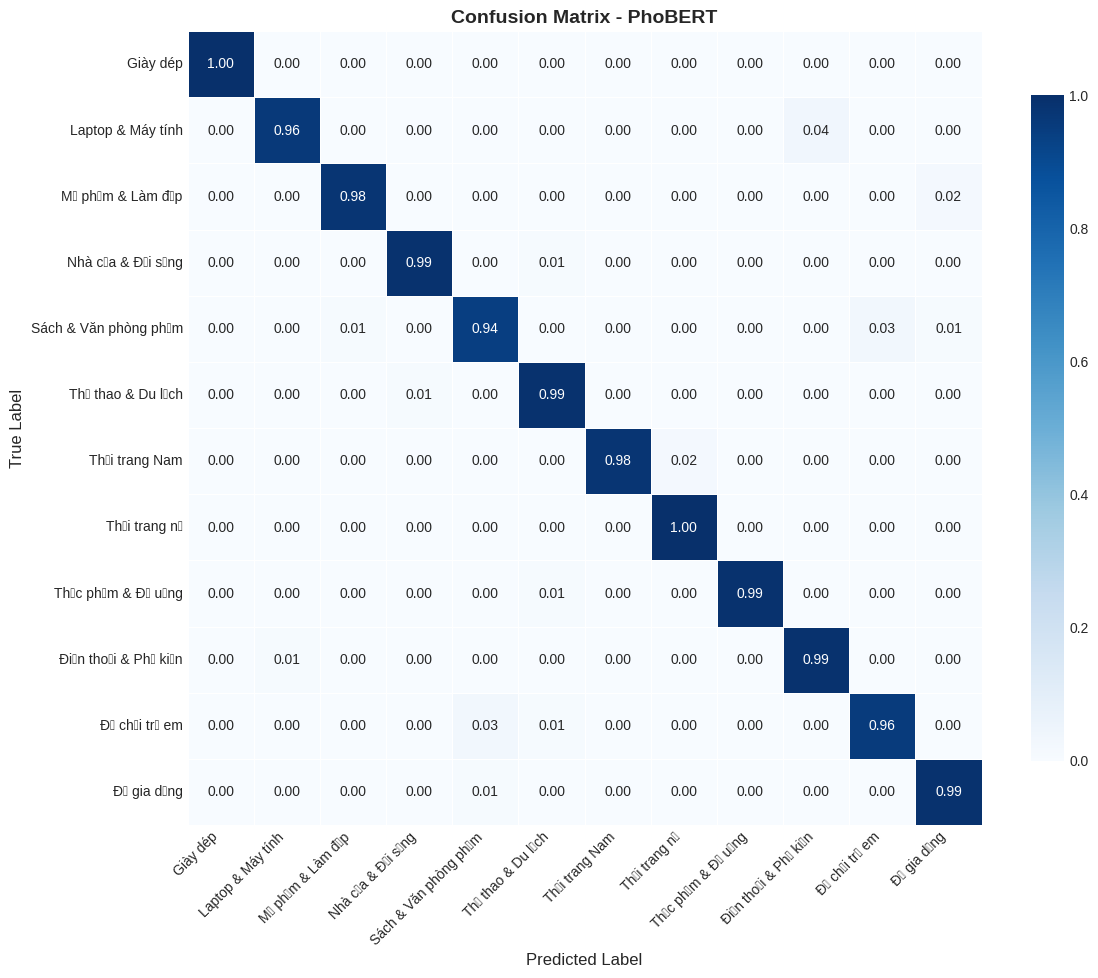

In [21]:
# Confusion matrix for best model
summary_df = create_results_summary(all_results, class_names)
best_model_name = summary_df.iloc[0]['Model']

print(f"Best Model: {best_model_name}")

fig = plot_confusion_matrix(
    all_results[best_model_name]['confusion_matrix'],
    class_names,
    title=f"Confusion Matrix - {best_model_name}",
    normalize=True
)
plt.show()

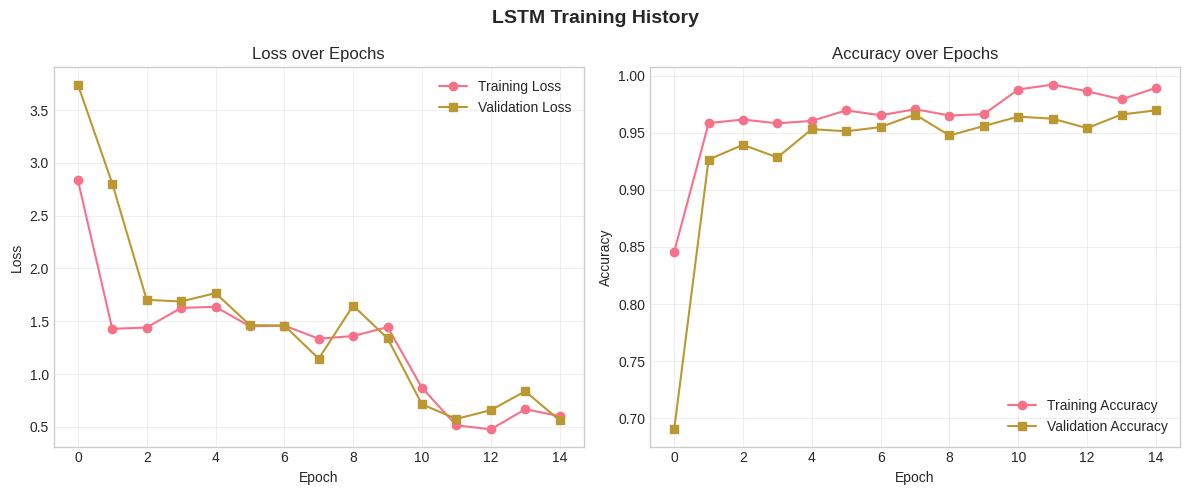

In [22]:
# LSTM Training History
if lstm_model.history:
    fig = plot_training_history(
        lstm_model.history.history,
        title="LSTM Training History"
    )
    plt.show()

## 7. Final Report

In [23]:
# Print final report
print_final_report(all_results, class_names)


                        FINAL EVALUATION REPORT

📊 MODEL PERFORMANCE SUMMARY:
--------------------------------------------------------------------------------
              Model  Accuracy  F1 (Macro)  F1 (Weighted)  Precision (Macro)  Recall (Macro)
            PhoBERT  0.980769    0.980518       0.980753           0.980801        0.980378
               LSTM  0.978938    0.978557       0.978913           0.979409        0.978222
                SVM  0.978022    0.977701       0.978001           0.978175        0.977447
Logistic Regression  0.972527    0.972263       0.972589           0.973243        0.971816
      Random Forest  0.961538    0.960905       0.961516           0.962338        0.960347

--------------------------------------------------------------------------------
🏆 BEST MODEL: PhoBERT
   F1 Score (Macro): 0.9805
   Accuracy: 0.9808

📈 PER-CLASS F1 SCORES (Best Model):
--------------------------------------------------------------------------------



In [24]:
# Save all visualizations to Drive
save_all_visualizations(all_results, class_names, VIS_DIR)

print(f"\nAll visualizations saved to:")
print(f"   {VIS_DIR}")

Comparison chart saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/model_comparison.png
Per-class metrics chart saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/f1_per_class.png
Confusion matrix saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/confusion_matrix_logistic_regression.png
Confusion matrix saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/confusion_matrix_svm.png
Confusion matrix saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/confusion_matrix_random_forest.png
Confusion matrix saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/confusion_matrix_lstm.png
Confusion matrix saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/confusion_matrix_phobert.png

Results summary saved to /content/drive/MyDrive/NLP-final-project-main/visualizations/results_summary.csv

All visualizations saved to /content/drive/MyDrive/NLP-final-project-main/visualiz

## 8. Summary Table

In [25]:
# Summary table with styling
summary_df = create_results_summary(all_results, class_names)

print("\n" + "="*80)
print("                     FINAL RESULTS SUMMARY")
print("="*80 + "\n")

display(summary_df)

print("\n" + "="*80)
print(f"🏆 BEST MODEL: {summary_df.iloc[0]['Model']}")
print(f"   Accuracy: {summary_df.iloc[0]['Accuracy']:.4f}")
print(f"   F1 (Macro): {summary_df.iloc[0]['F1 (Macro)']:.4f}")
print("="*80)


                     FINAL RESULTS SUMMARY



,Model,Accuracy,F1 (Macro),F1 (Weighted),Precision (Macro),Recall (Macro)
0,PhoBERT,0.980769,0.980518,0.980753,0.980801,0.980378
1,LSTM,0.978938,0.978557,0.978913,0.979409,0.978222
2,SVM,0.978022,0.977701,0.978001,0.978175,0.977447
3,Logistic Regression,0.972527,0.972263,0.972589,0.973243,0.971816
4,Random Forest,0.961538,0.960905,0.961516,0.962338,0.960347



🏆 BEST MODEL: PhoBERT
   Accuracy: 0.9808
   F1 (Macro): 0.9805


## 9. Test Prediction với Sample Data

In [26]:
def predict_category(text, model_name='svm'):
    """Dự đoán danh mục cho văn bản mới"""
    from src.preprocessing import create_preprocessor
    from src.feature_extraction import load_vectorizer
    from src.ml_models import load_ml_model
    from src.data_utils import load_label_encoder

    # Preprocess
    preprocessor = create_preprocessor(use_word_segmentation=False, remove_stopwords=True)
    processed_text = preprocessor.preprocess(text)

    # Vectorize
    vec = load_vectorizer()
    X = vec.transform([processed_text])

    # Load model and predict
    model = load_ml_model(model_name)
    prediction = model.predict(X)[0]
    probas = model.predict_proba(X)[0]

    # Get label name
    encoder = load_label_encoder()
    category = encoder.inverse_transform([prediction])[0]

    # Top 3 predictions
    top_indices = probas.argsort()[-3:][::-1]
    top_categories = [(encoder.classes_[i], probas[i]) for i in top_indices]

    return {
        'predicted_category': category,
        'confidence': probas[prediction],
        'top_3': top_categories
    }

# Test predictions
test_samples = [
    "Áo dài truyền thống màu đỏ thêu hoa, chất liệu lụa cao cấp, form dáng chuẩn",
    "Điện thoại Samsung Galaxy S24 Ultra, chip Snapdragon mới nhất, camera 200MP",
    "Laptop gaming ASUS ROG, RTX 4090, màn hình 144Hz, RAM 32GB",
    "Son môi MAC chính hãng, màu đỏ cherry, lâu trôi cả ngày",
    "Nồi chiên không dầu Philips, dung tích 6L, công nghệ RapidAir"
]

print("\n" + "="*80)
print("                     PREDICTION DEMO")
print("="*80 + "\n")

for i, text in enumerate(test_samples, 1):
    result = predict_category(text, 'svm')
    print(f"\n【{i}】 Input: {text}")
    print(f"    Predicted: {result['predicted_category']}")
    print(f"    Confidence: {result['confidence']:.2%}")
    print(f"    Top 3: {', '.join([f'{cat} ({prob:.1%})' for cat, prob in result['top_3']])}")
    print("-" * 80)


                     PREDICTION DEMO

Vectorizer loaded from /content/drive/MyDrive/NLP-final-project-main/models/tfidf_vectorizer.pkl
Model loaded from /content/drive/MyDrive/NLP-final-project-main/models/ml/svm.pkl

【1】 Input: Áo dài truyền thống màu đỏ thêu hoa, chất liệu lụa cao cấp, form dáng chuẩn
    Predicted: Thời trang nữ
    Confidence: 88.62%
    Top 3: Thời trang nữ (88.6%), Thể thao & Du lịch (3.6%), Thực phẩm & Đồ uống (2.0%)
--------------------------------------------------------------------------------
Vectorizer loaded from /content/drive/MyDrive/NLP-final-project-main/models/tfidf_vectorizer.pkl
Model loaded from /content/drive/MyDrive/NLP-final-project-main/models/ml/svm.pkl

【2】 Input: Điện thoại Samsung Galaxy S24 Ultra, chip Snapdragon mới nhất, camera 200MP
    Predicted: Điện thoại & Phụ kiện
    Confidence: 83.90%
    Top 3: Điện thoại & Phụ kiện (83.9%), Nhà cửa & Đời sống (3.1%), Laptop & Máy tính (3.1%)
----------------------------------------------------